# MLP로 MNIST 손글씨 분류 인공지능을 만들어 봄
-> 매우 성공적이다!!
-> 예측률이 매우 높다!!
-> ㄴㅇㅅ!!!

In [ ]:
# 이미지를 출력할 라이브러리
import matplotlib.pyplot as plt
# mnist 데이터 텐서플로우 케라스 데이터 셋에서 딱 가져오기
from tensorflow.keras.datasets import mnist
# 넘파이 가져오기 -> 임의 선택에 쓸 거임
import numpy as np

In [21]:
# MNIST 데이터셋 로드
(x_train , y_train), _ = mnist.load_data()

In [76]:
x_train.shape[:]

(60000, 28, 28)

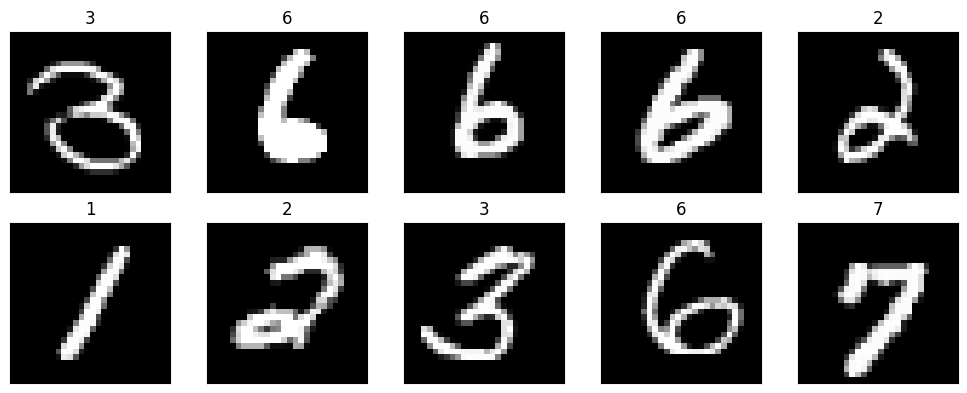

In [ ]:
# 샘플 이미지를 무작위로 선택하여 표시
num_samples = 10    # 샘플 수는 10개
random_indices = np.random.choice(x_train.shape[0], num_samples)
sample_images = x_train[random_indices]
sample_labels = y_train[random_indices]

plt.figure(figsize = (10, 4))
for i, (image, label) in enumerate(zip(sample_images, sample_labels)):
    plt.subplot(2, 5, i + 1)
    plt.imshow(image, cmap = 'gray')
    plt.title(label)
    plt.xticks([])
    plt.yticks([])
plt.tight_layout()
plt.show()

In [23]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.utils import to_categorical

# 데이터 정규화
x_train = x_train.astype('float32') / 255.0

# 라벨 원-핫 인코딩
y_train = to_categorical(y_train, 10)

# MLP 모델 구축
model = Sequential([
    Flatten(input_shape = (28, 28)),
    Dense(512, activation = 'relu'),
    Dense(10, activation = 'softmax')
])

# 모델 요약
model.summary()

# 모델 컴파일
model.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])

# 모델 훈련
model.fit(x_train, y_train, epochs = 10, batch_size = 32)

c:\주 폴더\학교\2024\세특\학술제\제출 파일\ClimateAI\AcademicFestival\ssgVenv\Lib\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten_1 (Flatten)             │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 512)            │       401,920 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 10)             │         5,130 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 407,050 (1.55 MB)

 Trainable params: 407,050 (1.55 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.9001 - loss: 0.3411
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - accuracy: 0.9736 - loss: 0.0845
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 11s 6ms/step - accuracy: 0.9835 - loss: 0.0522
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.9888 - loss: 0.0354
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 11s 6ms/step - accuracy: 0.9927 - loss: 0.0233
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 12s 6ms/step - accuracy: 0.9942 - loss: 0.0191
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 11s 6ms/step - accuracy: 0.9952 - loss: 0.0150
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.9968 - loss: 0.0106
Epoch 9/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 11s 6ms/step - accuracy: 0.9959 - loss: 0.0128
Epoch 10/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 11s 6ms/step - accuracy: 0.9964 - loss: 0.0100


In [24]:
# 모델 저장
model.save("MNIST_MLP.h5")

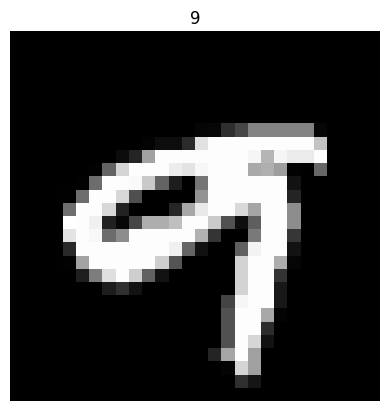

In [ ]:
# 모델 로드
from tensorflow.keras.models import load_model
model = load_model("MNIST_MLP.h5")

# MNIST 테스트 데이터셋 불러오기
_, (x_test, y_test) = mnist.load_data()

# 특정 인덱스의 이미지 출력 함수
def display_image(index):
    image = x_test[index]
    plt.imshow(image, cmap = 'gray')
    plt.title(y_test[index])
    plt.axis('off')
    plt.show()

# 예시: 인덱스 0의 이미지 출력
display_image(np.random.choice(len(x_test)))

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


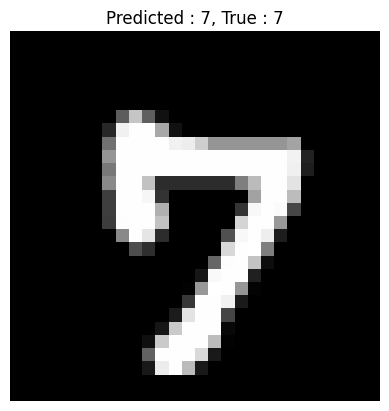

In [96]:
# 데이터 전처리
x_test_reshape = x_test.reshape(-1, 28, 28, 1)  # 모델에 맞는 형태로 변환
x_test_reshape = x_test.astype("float32") / 255

# 테스트 세트 데이터 에측
prediction = model.predict(x_test_reshape)

# 예측 상황 표시
shw_index = np.random.choice(len(x_test))
plt.imshow(x_test[shw_index], cmap = 'gray')
plt.title(f"Predicted : {np.argmax(prediction[shw_index])}, True : {y_test[shw_index]}")
plt.axis('off')
plt.show()